# X To A Boxplots

In [35]:
import os
import sys
from pathlib import Path
from itertools import zip_longest

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs, TSNEPlot
from larval_gonad.config import memory
from larval_gonad.scRNAseq import CLUSTER_ANNOT, CLUSTER_ORDER
from larval_gonad.x_to_a import multi_chrom_boxplot, commonly_expressed, CHROMS_CHR, MAJOR_ARMS_CHR

# Setup notebook
nbconfig = Nb.setup_notebook(subproject_dir='../output/science_submission', 
                             seurat_dir='../output/combined_testis_force', 
                             formats=['pdf', ], styles=['notebook', 'paper'])

last updated: 2018-05-04 
Git hash: 59ecd424780ee0f4946fac686cdb2769e214a832


In [3]:
clusters = nbconfig.seurat.get_clusters()
tsne = nbconfig.seurat.get_tsne()
norm = nbconfig.seurat.get_normalized_read_counts()

## X To A Analysis (commonly expressed)

In [4]:
expressed = commonly_expressed(norm)
dat = norm.T.join(clusters['res.0.4'])
dat.rename({'res.0.4': 'cluster'}, inplace=True, axis=1)

In [6]:
dat.cluster = dat.cluster.apply(lambda x: CLUSTER_ANNOT[x])

In [21]:
dd = dat.copy()
dd[dd == 0] = np.nan

In [26]:
test_on = dd.groupby('cluster').median().dropna(axis=1).T.join(nbconfig.fbgn2chrom)

In [44]:
ribo = []
for k, v in nbconfig.fbgn2symbol.items():
    if v.startswith('Rp') and k in test_on.index:
        ribo.append(k)

In [46]:
len(ribo)

131

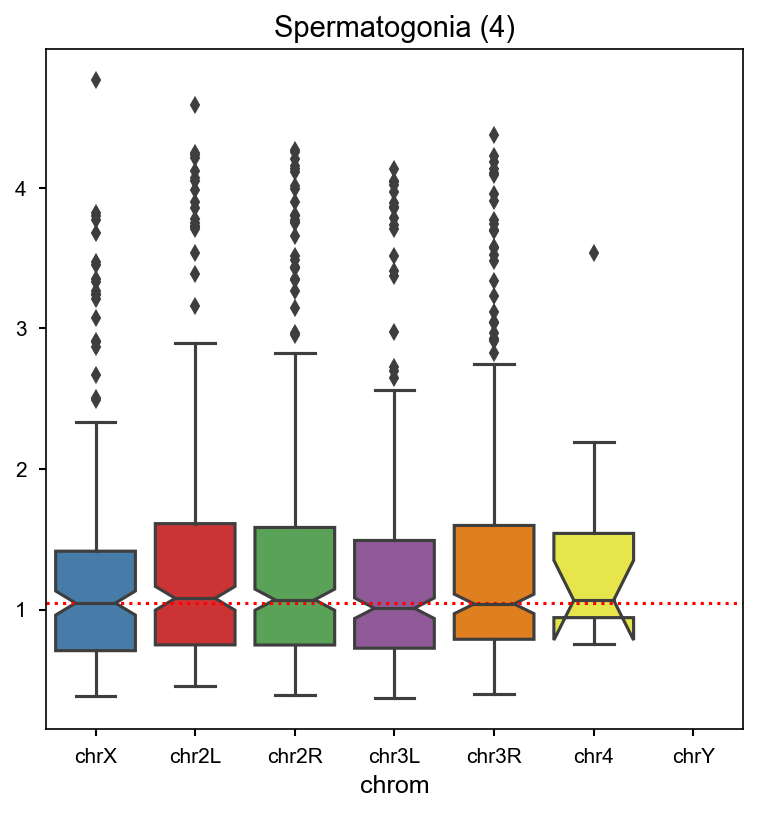

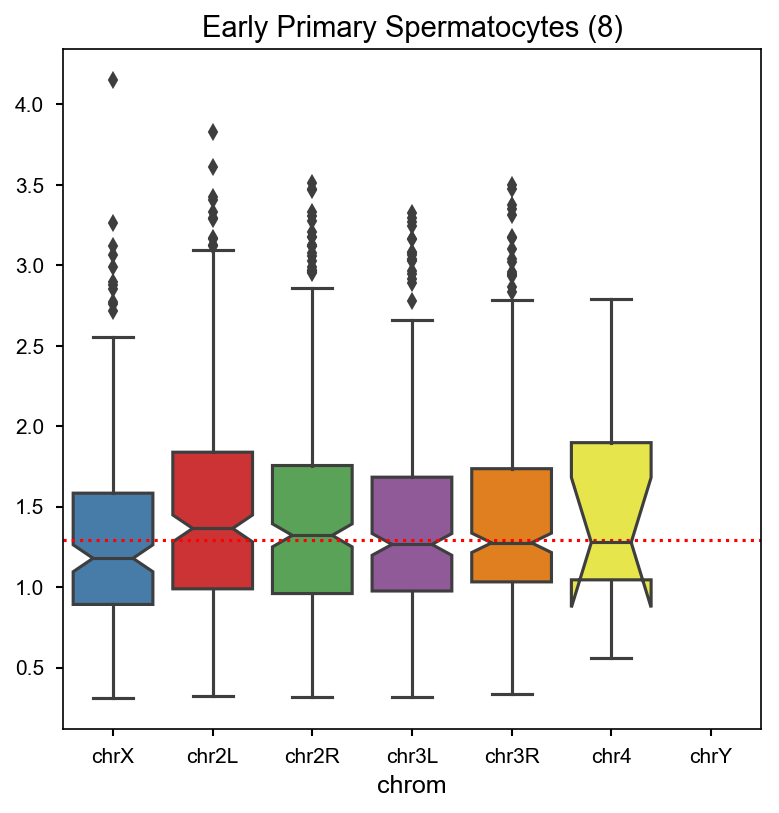

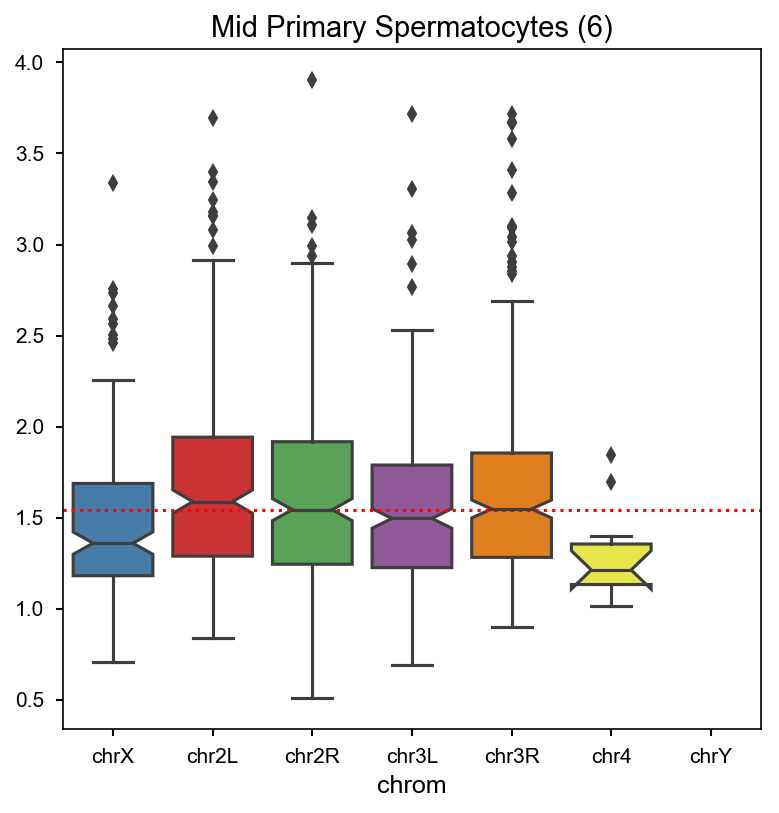

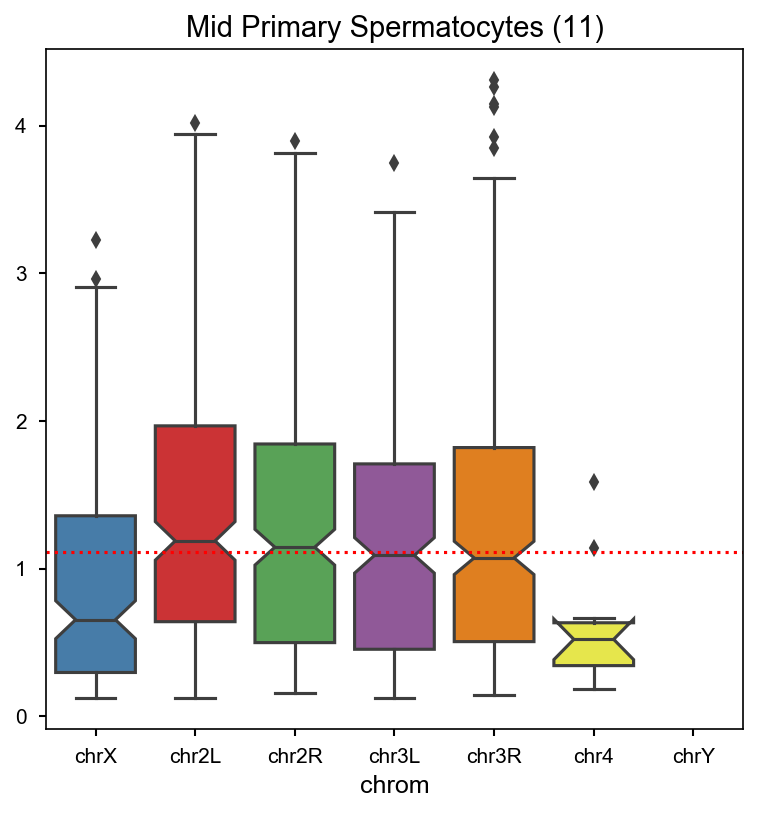

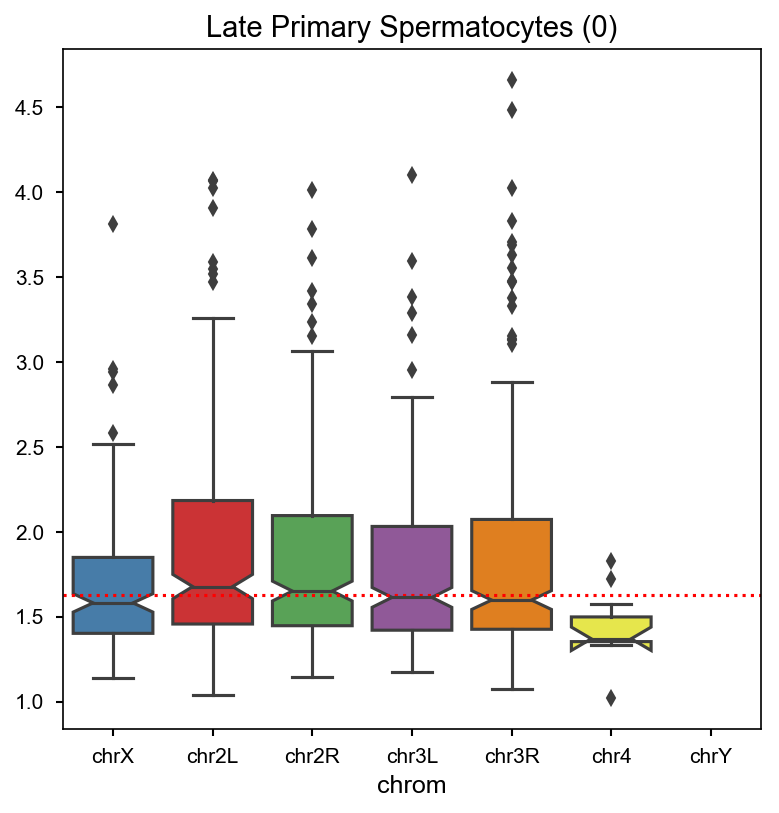

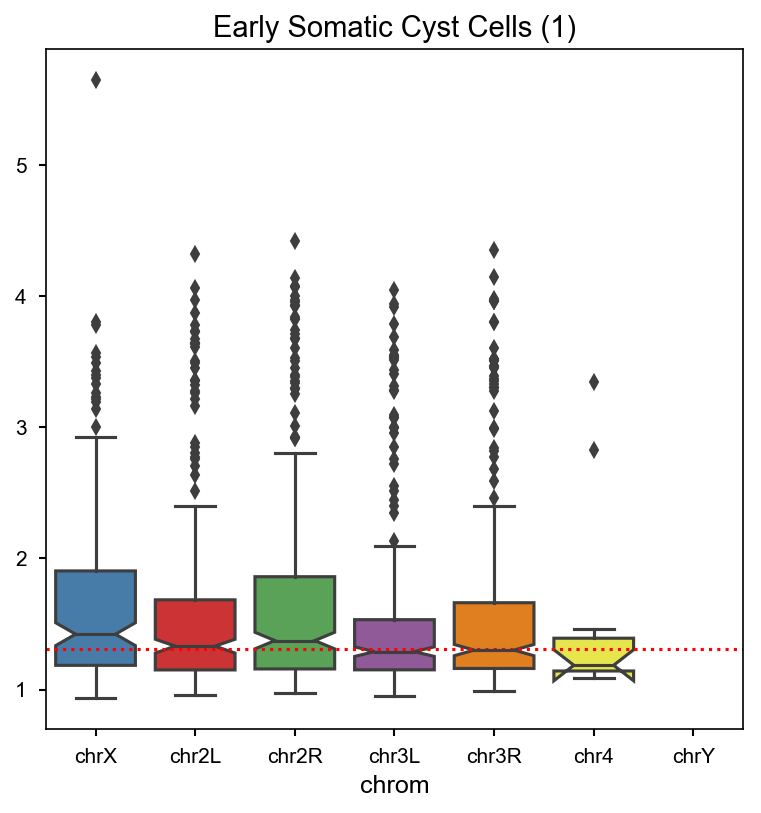

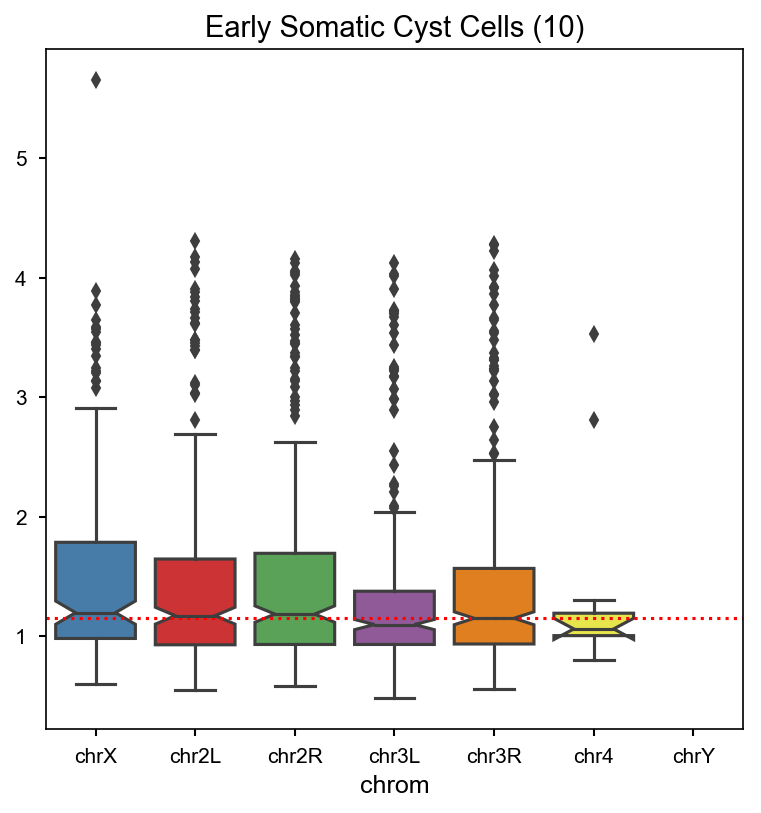

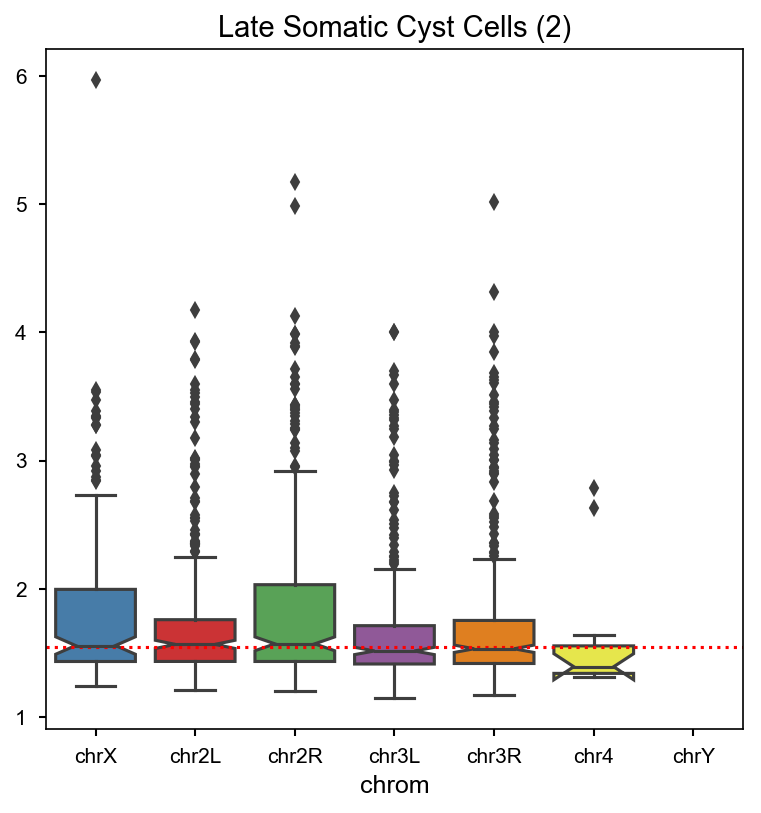

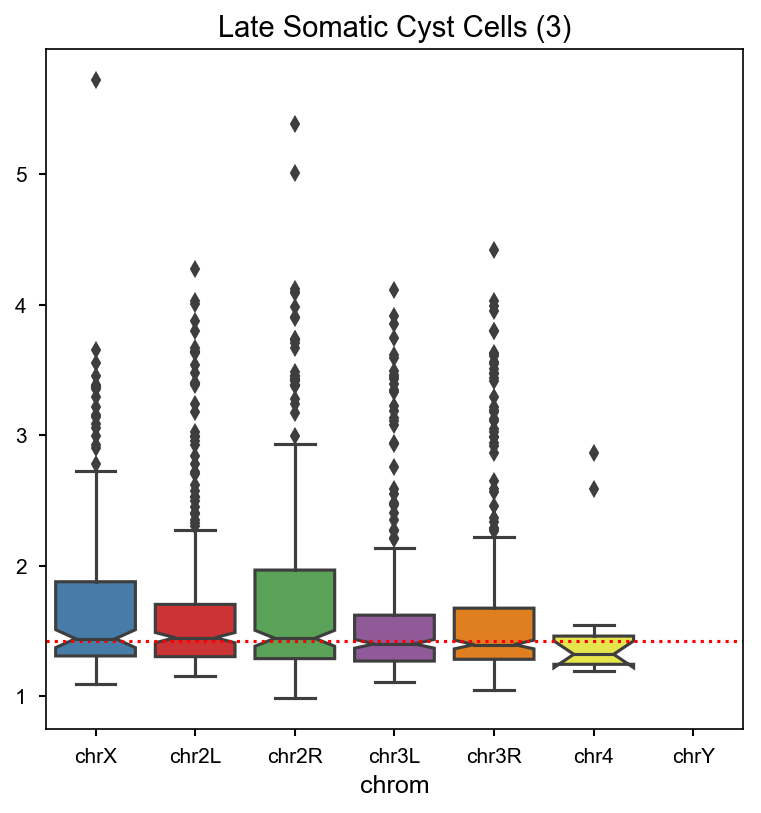

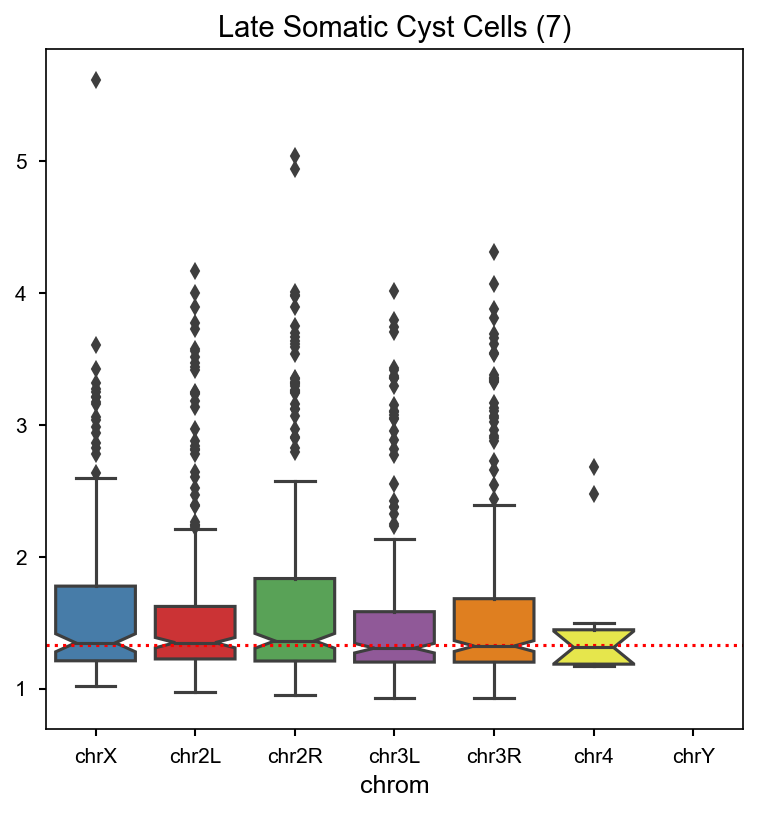

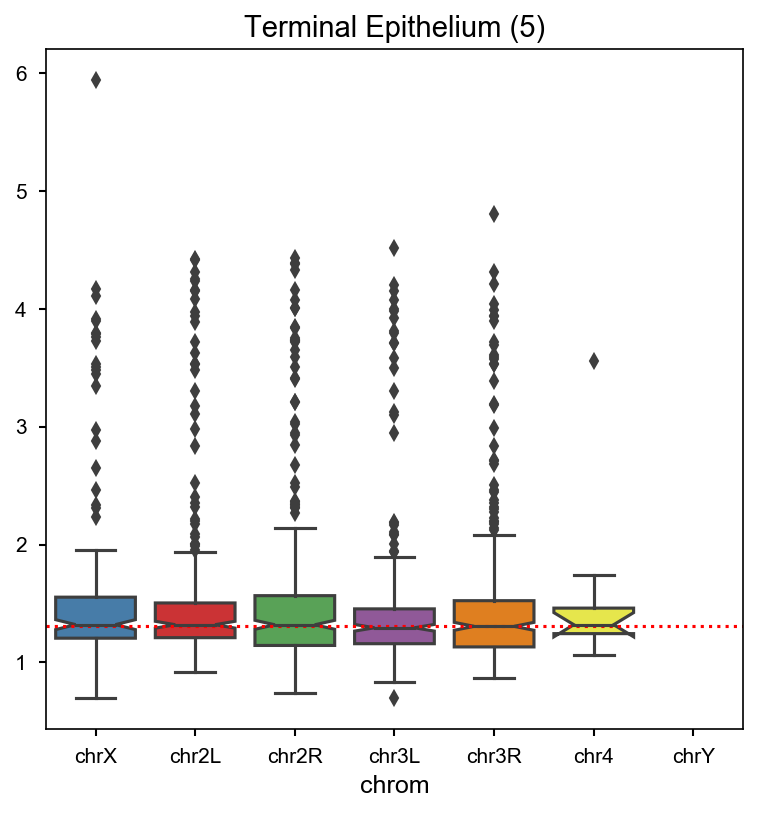

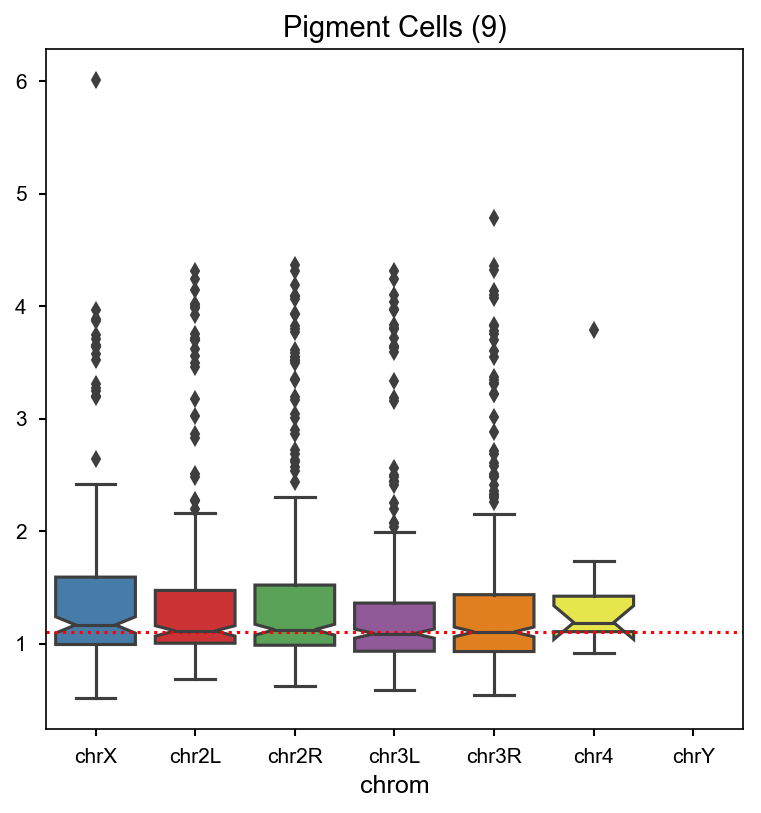

In [67]:
for clus in CLUSTER_ORDER:
    fig, ax = plt.subplots(1, 1)
    sns.boxplot(
        x='chrom', 
        y=clus, 
        data=test_on.loc[expressed].query('chrom != "chrM"'), 
        notch=True, 
        order=CHROMS_CHR,
        ax=ax
    )
    
    _med = test_on.loc[expressed].query(f'chrom in {MAJOR_ARMS_CHR}')[clus].median()
    ax.set_title(clus)
    ax.set_ylabel('')
    ax.axhline(_med, color='r', ls=':')

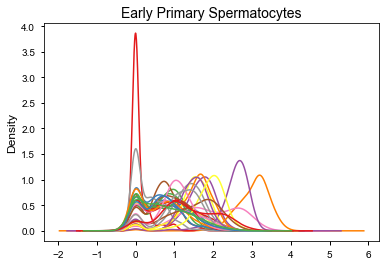

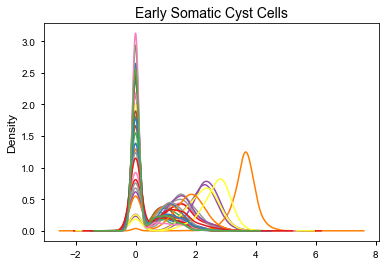

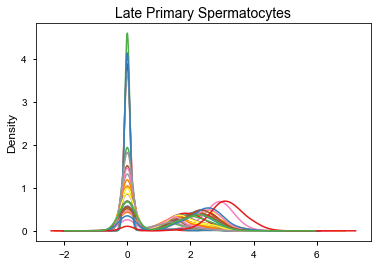

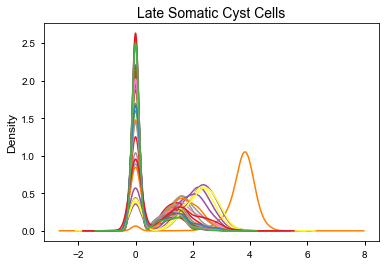

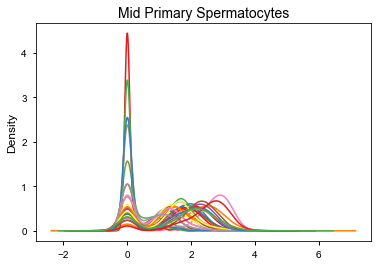

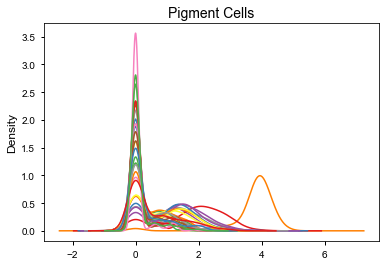

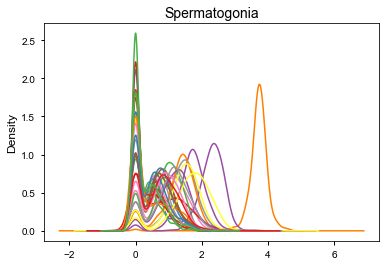

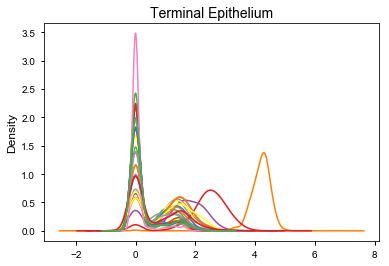

In [269]:
for g, dd in dat.groupby('cluster'):
    ax = dd.loc[:, expressed[-30:]].plot(kind='kde', legend=False)
    ax.set_title(g)

In [50]:
biomark = pd.read_csv(Path(nbconfig.seurat_dir, 'biomarkers_0.4.tsv'), sep='\t')

In [52]:
biomark.primary_FBgn.unique().shape

(5761,)

In [62]:
biomark.query('p_val_adj <= 0.001').primary_FBgn.unique().shape

(5750,)